In [3]:
from sklearn import datasets
import numpy as np

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
digits=datasets.load_digits()


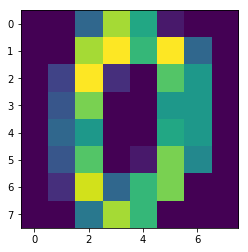

In [6]:
pylab.imshow(digits.data[0].reshape(8,8))


In [7]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

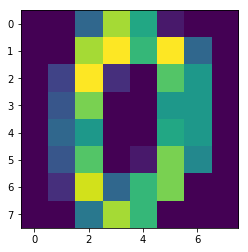

In [8]:
pylab.imshow(digits.images[0])

In [9]:
digits.data[0].shape

(64,)

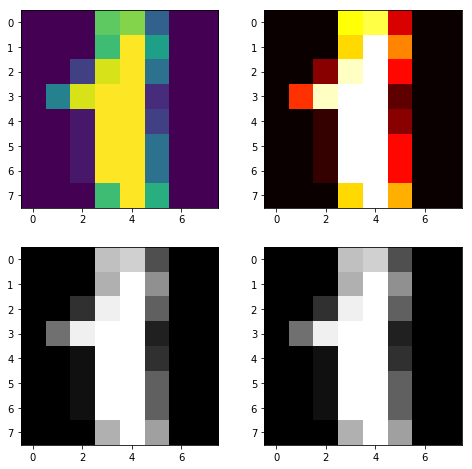

In [10]:
pyplot.figure(figsize(8,8))
pyplot.subplot(2,2,1)
pyplot.imshow(digits.images[1])

pyplot.subplot(2,2,2)
pyplot.imshow(digits.images[1], cmap="hot")

pyplot.subplot(2,2,3)
pyplot.imshow(digits.images[1], cmap="gray")

pyplot.subplot(2,2,4)
pyplot.imshow(digits.images[1], cmap="gray", interpolation="nearest")

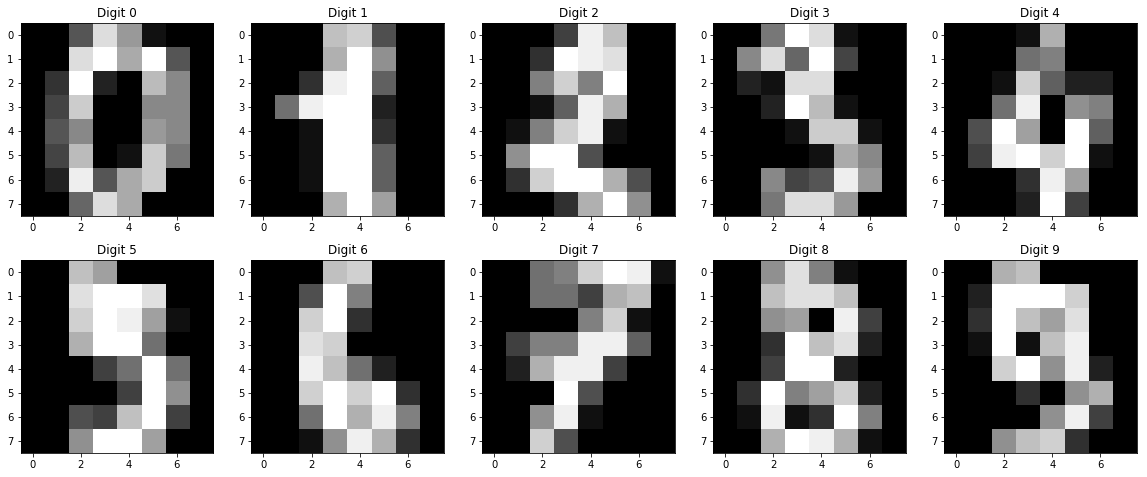

In [11]:
pyplot.figure(figsize(20,8))
for  im_number, imag in enumerate(digits.images[:10]):
    pyplot.subplot(2,5,im_number+1)
    pyplot.imshow(imag, cmap="gray")
    pyplot.title("Digit "+ str(digits.target[im_number]))


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from collections import Counter

In [24]:
data=digits.data[0:1400]
labels=digits.target[0:1400]

In [14]:
print(Counter(labels))

Counter({3: 104, 1: 102, 6: 101, 2: 100, 5: 100, 0: 99, 7: 99, 9: 99, 4: 98, 8: 98})


<Container object of 10 artists>

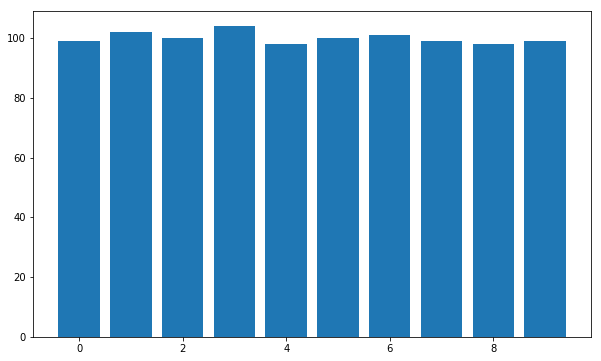

In [15]:
pylab.figure(figsize(10,6))
pylab.bar(Counter(labels).keys(), Counter(labels).values())

In [17]:
classifier=KNeighborsClassifier()
classifier.fit(data, labels)
print(classification_report(classifier.predict(data), labels))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        99
          1       1.00      0.97      0.99       105
          2       1.00      1.00      1.00       100
          3       1.00      0.98      0.99       106
          4       1.00      1.00      1.00        98
          5       0.99      1.00      0.99        99
          6       1.00      1.00      1.00       101
          7       0.99      0.99      0.99        99
          8       0.97      0.99      0.98        96
          9       0.96      0.98      0.97        97

avg / total       0.99      0.99      0.99      1000



In [18]:
# Уменьшаем размерность методом случайных проекций ЛИНЕЙНЫЙ

from sklearn import random_projection

In [25]:
projection=random_projection.SparseRandomProjection(n_components=2, random_state=0)
s=projection.fit_transform(data)

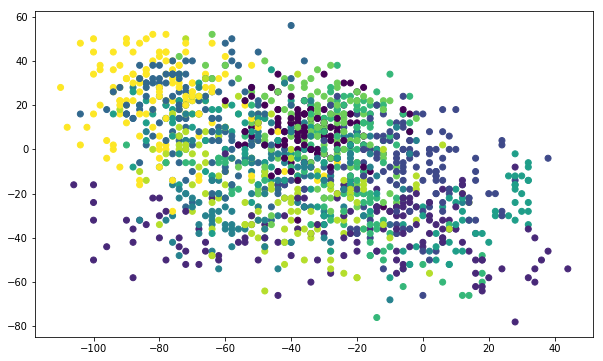

In [26]:
pyplot.scatter(s[:,0], s[:,1], c=labels)

In [21]:
classifier.fit(s, labels)
print(classification_report(classifier.predict(s), labels))

             precision    recall  f1-score   support

          0       0.74      0.47      0.58       154
          1       0.75      0.58      0.65       131
          2       0.67      0.59      0.63       113
          3       0.71      0.51      0.60       144
          4       0.38      0.56      0.45        66
          5       0.42      0.53      0.47        79
          6       0.52      0.57      0.55        93
          7       0.35      0.51      0.42        69
          8       0.37      0.58      0.45        62
          9       0.62      0.69      0.65        89

avg / total       0.60      0.55      0.56      1000



In [22]:
#метод главных компонент для уменьшения размерности ЛИНЕЙНЫЙ
from sklearn.decomposition import PCA

In [23]:
#pca= PCA(n_components=2, random_state=0, svd_solver="randomized")
#d2_data=pca.fit_transform(data)
labels.shape

(1000,)

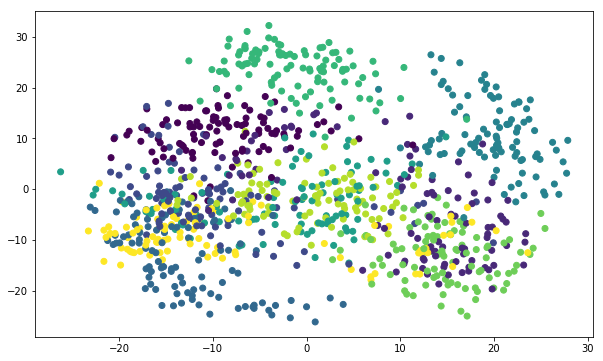

In [55]:
pyplot.scatter(d2_data[:,0], d2_data[:,1], c=labels)

In [56]:
classifier.fit(d2_data, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [58]:
print(classification_report(classifier.predict(d2_data), labels))

             precision    recall  f1-score   support

          0       0.83      0.73      0.77       113
          1       0.56      0.54      0.55       105
          2       0.59      0.57      0.58       104
          3       0.77      0.79      0.78       101
          4       0.95      0.93      0.94       100
          5       0.56      0.54      0.55       104
          6       0.92      0.93      0.93       100
          7       0.76      0.71      0.74       105
          8       0.62      0.66      0.64        92
          9       0.52      0.67      0.58        76

avg / total       0.71      0.71      0.71      1000



In [ ]:
# метод многомерного шкалирования multi-dimensional scaling, НЕЛИНЕЙНЫЙ

In [60]:
from sklearn import manifold
mds= manifold.MDS(n_components=2, n_init=1, max_iter=100)
mds_data=mds.fit_transform(data)

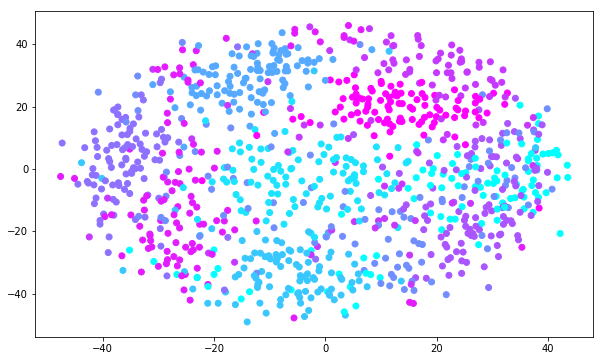

In [63]:
pyplot.figure(figsize(10,6))
pyplot.scatter(mds_data[:,0], mds_data[:,1], c=labels,cmap="cool_r")

In [65]:
classifier.fit(mds_data, labels)
print(classification_report(classifier.predict(mds_data), labels))

             precision    recall  f1-score   support

          0       0.91      0.81      0.86       111
          1       0.81      0.63      0.71       131
          2       0.57      0.75      0.65        76
          3       0.77      0.62      0.69       128
          4       0.87      0.85      0.86       100
          5       0.39      0.63      0.48        62
          6       0.91      0.85      0.88       108
          7       0.85      0.82      0.84       102
          8       0.85      0.74      0.79       112
          9       0.49      0.70      0.58        70

avg / total       0.77      0.74      0.75      1000



In [ ]:
# метод t-SNE, НЕЛИНЕЙНЫЙ, сохранение пропорций расстояний между признаками

In [68]:
tsne=manifold.TSNE(n_components=2, init="pca", random_state=0)
s1=tsne.fit_transform(data)


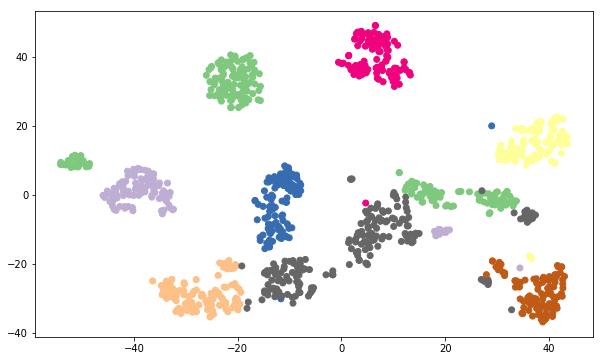

In [72]:
pyplot.figure(figsize(10,6))
pyplot.scatter(s1[:,0], s1[:,1], c=labels,cmap="Accent")

In [73]:
classifier.fit(s1, labels)
print(classification_report(classifier.predict(s1), labels))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        99
          1       1.00      0.99      1.00       103
          2       0.99      1.00      0.99        99
          3       1.00      0.97      0.99       107
          4       1.00      0.99      0.99        99
          5       0.98      1.00      0.99        98
          6       0.99      1.00      1.00       100
          7       0.99      0.98      0.98       100
          8       0.97      0.98      0.97        97
          9       0.97      0.98      0.97        98

avg / total       0.99      0.99      0.99      1000

